In [2]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
import scipy.optimize as op

### Bratu's problem `scipy`

$$y''=ke^y=0$$ 

Con las condiciones de contorno $y(0)=0$ y $y(1)=0$ y $k=1$.

In [3]:
#equation as a first-order system and implement its right-hand side evaluation
def fun(x, y):
    return np.vstack((y[1], -np.exp(y[0])))

#boundary condition residuals
def bc(ya, yb):
    return np.array([ya[0], yb[0]])

In [4]:
x = np.linspace(0, 1, 5)
y_a = np.zeros((2, x.size))
y_b = np.zeros((2, x.size))
y_b[0] = 3

In [5]:
res_a = solve_bvp(fun, bc, x, y_a)
res_b = solve_bvp(fun, bc, x, y_b)

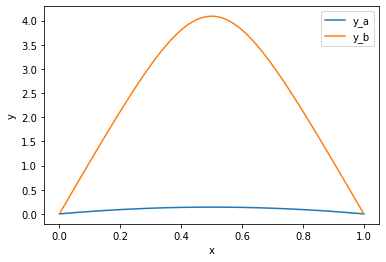

In [6]:
x_plot = np.linspace(0, 1, 100)
y_plot_a = res_a.sol(x_plot)[0]
y_plot_b = res_b.sol(x_plot)[0]
import matplotlib.pyplot as plt
plt.plot(x_plot, y_plot_a, label='y_a')
plt.plot(x_plot, y_plot_b, label='y_b')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Bratu's problem `dif_finitas`

Vamos a resolver la misma ecuación diferencial $y''=ke^y=0$ con las condiciones de contorno $y(0)= y(1)=0$, utilizando el método de diferencias finitas.

Utilizando $\dfrac{d^2y}{dx^2}=\dfrac{y_{i−1}−2y_i+y_{i+1}}{h^2}$, nos queda un sistema de ecuanciones no lineales de la forma:

$$y_0 = 0$$

$$y_0 - 2y_1 + y_2 = -h²e^{y_1} $$

$$\vdots$$

$$y_{n-2} -2y_{n-1} + y_n = -h²e^{y_{n-1}}$$

$$y_n=0$$

In [7]:
def funcion(y):
    global n #numero de celdas
    #n = 50  
    K = 1   #constante en el problema
    h = 1/n #tamaño de la celda
    F = np.zeros(n+1)
    #F[0]=0
    F[0] = -2*y[0]+y[1]+h**2*K*np.exp(y[0])
    #F[-1]=0
    F[-1] = y[n-1]-2*y[n]+h**2*K*np.exp(y[n])
    for i in range(1,n):
        F[i] = y[i-1]-2*y[i]+y[i+1]+h**2*K*np.exp(y[i])
    return F

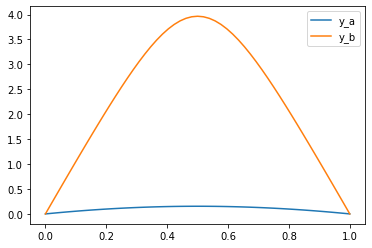

In [8]:
n = 50
y0_a = np.zeros(n+1)
y0_b = 3*np.ones(n+1)

root_a = op.fsolve(funcion, y0_a)
root_b = op.fsolve(funcion, y0_b)

y_a = np.append(root_a,0) 
y_a = np.append(0,y_a)
#print(y_a)

y_b = np.append(root_b,0) 
y_b = np.append(0,y_b)


x = np.linspace(0,1,n+3)
plt.plot(x,y_a, label='y_a')
plt.plot(x,y_b, label='y_b')
plt.legend()
plt.show()

### Sturm-Liouville problem `scipy`

$$y''+k²y=0=$$

Con las condiciones iniciales $y(0) = y(1) =0$.

In [9]:
def fun(x, y, p):
    k = p[0]
    return np.vstack((y[1], -k**2 * y[0]))

def bc(ya, yb, p):
    k = p[0]
    return np.array([ya[0], yb[0], ya[1] - k])

In [10]:
x = np.linspace(0, 1, 5)
y = np.zeros((2, x.size))
y[0, 1] = 1
y[0, 3] = -1

sol = solve_bvp(fun, bc, x, y, p=[6])

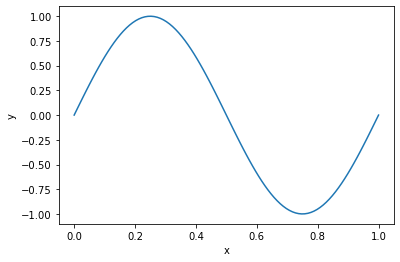

In [12]:
x_plot = np.linspace(0, 1, 100)
y_plot = sol.sol(x_plot)[0]
plt.plot(x_plot, y_plot)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Sturm-Liouville problem `dif_finitas`

Utilizando $\dfrac{d^2y}{dx^2}=\dfrac{y_{i−1}−2y_i+y_{i+1}}{h^2}$, nos queda un sistema de ecuanciones lineales de la forma:

$$y_0 = 0$$

$$y_0 + (-2+k²h²)y_1 + y_2 = 0 $$

$$\vdots$$

$$y_{n-2} + (-2+k²h²)y_{n-1} + y_n = 0$$

$$y_n=0$$

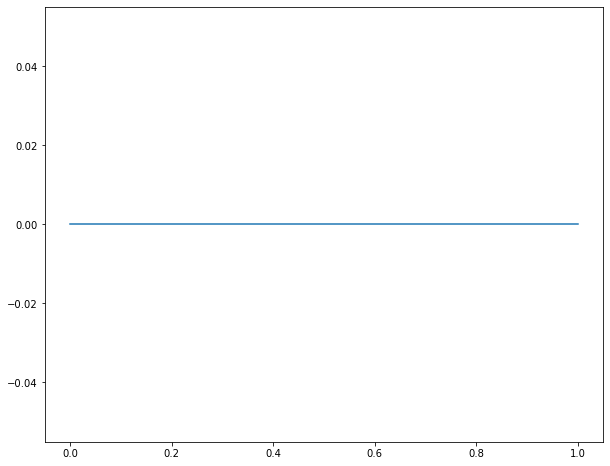

In [30]:
n = 100
h = 1/n
k = 6*np.pi

# Get A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -2+(k*h)**2
    A[i, i+1] = 1
#print(A)

# Get b
b = np.zeros(n+1)
#b[0]=0.025
#print(b)

# solve the linear equations
y = np.linalg.solve(A, b)

x = np.linspace(0, 1, n+1)

plt.figure(figsize=(10,8))
plt.plot(x, y)
plt.show()

¿Cómo hacer para que me bote la solución no trivial? $y=A\sin(kx)$ con $k=n \pi$